In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import compute_sample_weight
from sklearn.metrics import balanced_accuracy_score
from plot_learning_curve import plot_learning_curve, plot_validation_curve
import matplotlib.pyplot as plt
from sklearn import preprocessing

None


In [2]:
adult_train = pd.read_csv("adult-t.tsv", sep = "\t")
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,42.0,4,308770.0,15,10.0,2,1,0,2,1,0.0,0.0,40.0,39,0
1,23.0,4,520231.0,15,10.0,4,10,1,4,0,0.0,0.0,45.0,39,1
2,27.0,4,164924.0,11,9.0,4,3,1,4,1,0.0,0.0,40.0,39,1
3,29.0,6,198286.0,9,13.0,4,10,1,4,0,0.0,0.0,40.0,39,1
4,32.0,4,197505.0,11,9.0,4,1,3,4,0,0.0,0.0,40.0,39,1


In [3]:
adult_train = pd.get_dummies(adult_train, columns=['workclass', 'education', 'sex', 'occupation', 'relationship', 'race', 'native-country', 'marital-status'])
adult_train.shape

(10000, 108)

In [4]:
adult_train['target'].value_counts()/adult_train.shape[0]

1    0.7641
0    0.2359
Name: target, dtype: float64

In [5]:
normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  adult_train[columns] = scaler.fit_transform(adult_train[columns])
normalize(normalize_columns)

In [6]:
adult_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_0,workclass_1,workclass_2,...,native-country_39,native-country_40,native-country_41,marital-status_0,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6
0,0.256001,1.147329,10.0,-0.142312,-0.219004,-0.043466,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,-1.127709,3.179989,10.0,-0.142312,-0.219004,0.358104,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.836402,-0.235385,9.0,-0.142312,-0.219004,-0.043466,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,-0.690748,0.085306,13.0,-0.142312,-0.219004,-0.043466,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-0.472268,0.077798,9.0,-0.142312,-0.219004,-0.043466,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [7]:
X = adult_train[[c for c in adult_train.columns if c != 'target']]
y = adult_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Trying NN Classifier without HyperParameter tunings

In [8]:
base_clf = MLPClassifier()

In [9]:
base_clf.fit(X_train, y_train)
y_train_pred = base_clf.predict(X_train)
y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.8653221946419734
Test Accuracy:  0.7496894134350873


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
base_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Generate Learning Curve & Validation Curve with default classifier

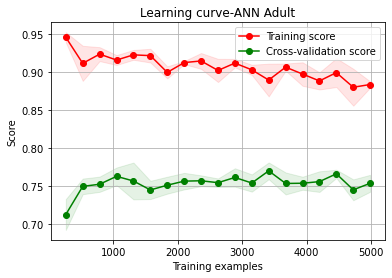

In [11]:
plot_learning_curve(base_clf, "Learning curve-ANN Adult", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

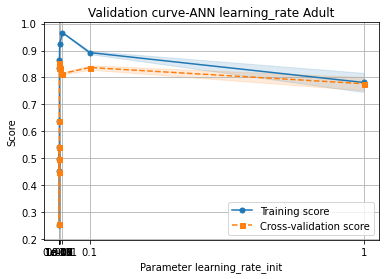

In [12]:
plot_validation_curve(base_clf, X_train, y_train, 'learning_rate_init', [0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1], cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-ANN learning_rate Adult")

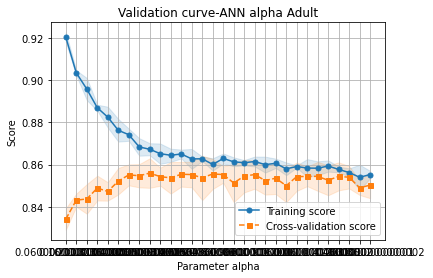

In [32]:
plot_validation_curve(base_clf, X_train, y_train, 'alpha', np.arange(0.01, 1.5, 0.05), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-ANN alpha Adult")

In [31]:
np.arange(0.01, 1.5, 0.05)

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96, 1.01, 1.06,
       1.11, 1.16, 1.21, 1.26, 1.31, 1.36, 1.41, 1.46])

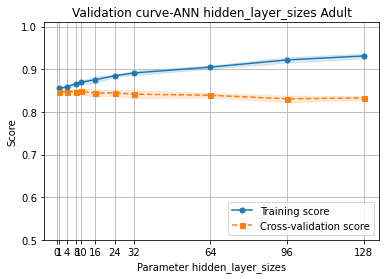

In [14]:
plot_validation_curve(base_clf, X_train, y_train, 'hidden_layer_sizes', [(0), (1), (4), (8), (10), (16), (24), (32), (64), (96), (128)], cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score),ylim=(0.5, 1.01), title="Validation curve-ANN hidden_layer_sizes Adult")

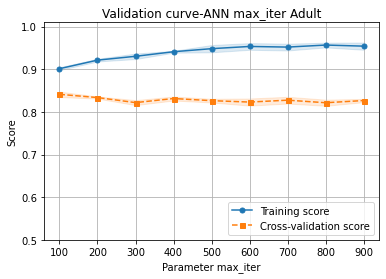

In [15]:
plot_validation_curve(base_clf, X_train, y_train, 'max_iter', np.arange(100, 1000, 100), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score),ylim=(0.5, 1.01), title="Validation curve-ANN max_iter Adult")

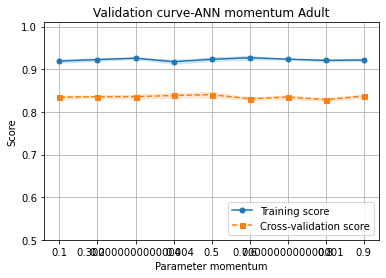

In [16]:
plot_validation_curve(base_clf, X_train, y_train, 'momentum', np.arange(0.1, 1.0,0.1), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score),ylim=(0.5, 1.01), title="Validation curve-ANN momentum Adult")

### Conducting GridSearch to obtain best HyperParameters 

In [17]:
param_grid = {
        'activation':['sigmoid', 'relu'],
        'alpha': np.arange(0.1, 1.2, 0.3),
        'hidden_layer_sizes': [(0), (8), (10), (16), (32), (64), (96)], #[(32), (64), (64, 64), (128), (128,128)], #, (32, 64, 32), (64, 128, 64)],
        'learning_rate_init': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
      }

In [18]:
grid_search = GridSearchCV(base_clf, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 630 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=4, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['sigmoid', 'relu'],
                         'alpha': array([0.5, 0.8, 1.1, 1.4, 1.7]),
                         'hidden_layer_sizes': [0, 8, 10, 16, 32, 64, 96],
                         'learning_rate_init': [1e-08, 1e-07, 1e-06, 1e-05,
                                                0.0001, 0.001, 0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [19]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.5,
 'hidden_layer_sizes': 96,
 'learning_rate_init': 0.1}

In [20]:
grid_search.best_estimator_

MLPClassifier(alpha=0.5, hidden_layer_sizes=96, learning_rate_init=0.1)

In [21]:
grid_search.best_score_

0.7920080812047783

### Generating Learning Curve with tuned Hyperparameters

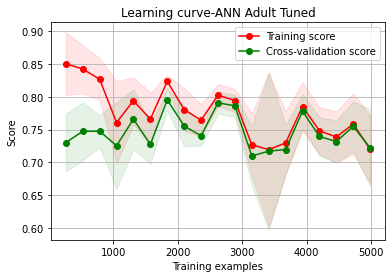

In [25]:
plot_learning_curve(grid_search.best_estimator_, "Learning curve-ANN Adult Tuned", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

### Fitting classifier with best parameters and calculating test score 

In [28]:
# best_params = grid_search.cv_results_['params'][np.argmax(grid_search.cv_results_['mean_test_score'])]
# best_clf = MLPClassifier(**best_params)
# best_clf.get_params()

best_clf = MLPClassifier(alpha=0.5, hidden_layer_sizes=16, learning_rate_init=0.01)

In [29]:
best_clf.fit(X_train, y_train)
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.7915014144738444
Test Accuracy:  0.783328896382406
